# Small conductance based network

In this project, we aim at simulating a small (two-neuron) network formed by identical conductance-
based neuron models, with the following structure:
- Neuron 1 receives a Poisson input at ν Hz through synapses modulated by an α function.
- Neuron 1 excites Neuron 2 through a graded synapsis.
- Neuron 2 inhibits Neuron 1 through a graded synapsis.

In the last part of the project, we will study the effect of plasticity (facilitation and depression).



**1-Simulate an input Poisson train for 1 second with rate $ν = 50Hz$**. 

For the homogeneous Poisson process we have $P\,[\text{ 1 spike during } \delta t]=r\delta t$ where $r$ is the input rate. This equation can be used to generate a Poisson  spike train $\{t_j\}_{j=1}^{n_{spk}}$ by first subdividing time into short intervals, each of duration $\delta t$. Then, generate a sequence of random numbers $x[i]$, uniformly distributed between 0 and 1. For each $\delta t$-interval, if $x[i] ≤ r∆t$, generate a spike. Otherwise, no spike is generated. This procedure is appropriate only when $\delta t$ is very small, i.e, only when $r\delta t$ << 1. Typically, ${\delta t}$ = 0.1 msec should suffice. 

For more information, see these notes by David Heeger (NYU).

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({
    'font.family': 'serif',
})

Simple run

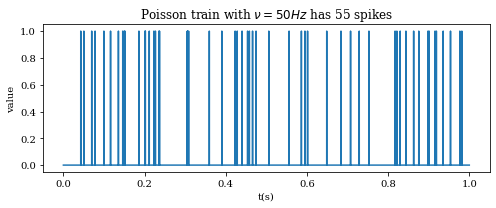

In [2]:
dt = 0.0001 # dt = 0.1msec
t = np.arange(0.0, 1.0, dt)
rate = 50

spikes = np.random.rand(len(t)) < rate*dt #Determine list of times of spikes
spikes = spikes.astype(int)

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(t, spikes)
ax.set(title=f"Poisson train with $ν = 50Hz$ has {np.sum(spikes)} spikes",
       xlabel="t(s)",
       ylabel="value")
fig.tight_layout()
fig.show()

Number of spikes histogram

In [30]:
dt = 0.0001 # dt = 0.1msec
t = np.arange(0.0, 1.0, dt)
rate = 50

n_runs = 10000
results = np.zeros(n_runs)
for i in range(n_runs):
    spikes = np.random.rand(len(t)) < rate*dt #Determine list of times of spikes
    spikes = spikes.astype(int)
    results[i] = np.sum(spikes)

In [31]:
from math import factorial

In [32]:
index = list(np.linspace(20,80,80-20+1).astype(int))
ab= []
for i in range(20,81):
    val = np.e**(-50)*(50**i)/(factorial(i))
    ab.append(val)

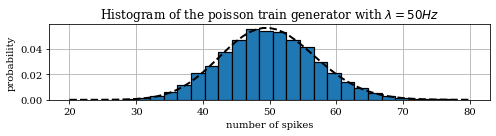

In [33]:
fig, ax = plt.subplots(figsize=(7,2))
ax.grid(zorder=0)
ax.hist(results,25,density=True,edgecolor='black', color='tab:blue', linewidth=1.2, zorder=2)
ax.plot(index, ab, c='black', lw=2, ls='--')
ax.set(title=f"Histogram of the poisson train generator with $\lambda = 50Hz$",
       xlabel="number of spikes",
       ylabel="probability")


fig.tight_layout()
plt.savefig('./img/poisson_hist.pdf',  bbox_inches = "tight")

Time between spikes histogram

In [34]:
dt = 0.0001 # dt = 0.1 msec
t = np.arange(0.0, 1.0, dt)
rate = 50

n_runs = 100
intervals = []
for i in range(n_runs):
    spikes = np.random.rand(len(t)) < rate*dt #Determine list of times of spikes
    ind = np.where(spikes)[0]
    intervals.append(ind[1:]-ind[:-1])
    
intervals = np.concatenate(intervals).ravel()

In [35]:
a = []
for i in range(1,150):
    val = 50*np.e**(-i*50/1000)/1000
    a.append(val)

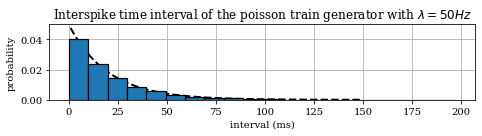

In [36]:
fig, ax = plt.subplots(figsize=(7,2))
ax.grid(zorder=0)
ax.hist(intervals*0.1,20,density=True,edgecolor='black', linewidth=1.2, zorder=3)
ax.plot(range(1,150), a, c='black', lw=2, ls='--')
ax.set(title=f"Interspike time interval of the poisson train generator with $\lambda = 50Hz$",
       xlabel="interval (ms)",
       ylabel="probability")
fig.tight_layout()
plt.savefig('./img/ISI_hist.pdf',  bbox_inches = "tight")

<ipython-input-38-196aa0f113dd>:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


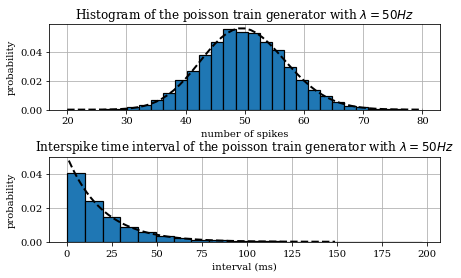

In [38]:
fig, ax = plt.subplots(2,1,figsize=(7,4), gridspec_kw={'hspace':0.55 })

ax[0].grid(zorder=0)
ax[0].hist(results,25,density=True,edgecolor='black', color='tab:blue', linewidth=1.2, zorder=2)
ax[0].plot(index, ab, c='black', lw=2, ls='--')
ax[0].set(title=f"Histogram of the poisson train generator with $\lambda = 50Hz$",
       xlabel="number of spikes",
       ylabel="probability")

ax[1].grid(zorder=0)
ax[1].hist(intervals*0.1,20,density=True,edgecolor='black', linewidth=1.2, zorder=3)
ax[1].plot(range(1,150), a, c='black', lw=2, ls='--', zorder=4)
ax[1].set(title=f"Interspike time interval of the poisson train generator with $\lambda = 50Hz$",
       xlabel="interval (ms)",
       ylabel="probability")

fig.tight_layout()
plt.savefig('./img/poisson_hist.pdf',  bbox_inches = "tight")

In [41]:
def spike_train(d, rate, dt):
    """ Generates Poisson delta train
    Params:
    d (int): duration in milliseconds of the train
    rate (int): how many firings per second (Hz)
    dt (float): time differential used in the simulation
    Returns:
    result (np.array) with the indexes of the spikes
    """
    # As the standard dt is 1ms and this is not enough for this method to
    # give accurate results I add a reduction factor to spike generation
    n = int(d/dt)
    spikes = np.random.rand(n) < rate/1000*dt # Here we divide by 1000 bc milliseconds
    index = np.where(spikes)[0]
    return index*dt

<ipython-input-54-80e5923695a2>:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


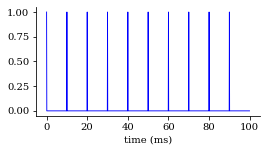

In [54]:
# Powerpoint plot
# Plot report
d,n=100,1000
t = np.linspace(0.0, d, n)
rate = 50

fig, ax = plt.subplots(1,1,figsize=(4,2), sharex=True, gridspec_kw={'hspace':0.2 })

r=450

spikes = spike_train(d,r,n/d)
    
spike_p = np.zeros(n)
spike_p[np.rint(spikes*n/d).astype(int)] += 1   # Multiply by quotient of d/n_samples
    
ax.plot(t, spike_p ,label=f'$\lambda = {{{r}}}$', c='b', lw=0.9)
ax.set(ylabel="")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set(xlabel="time (ms)")
fig.tight_layout()
plt.savefig('./img/spike_trains_ppt.pdf', bbox_inches = "tight")

<ipython-input-50-c67684bf32aa>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


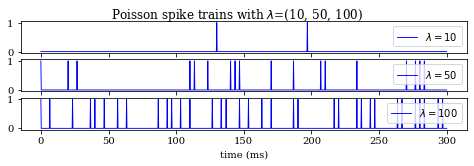

In [50]:
# Plot report
d,n=300,1000
t = np.linspace(0.0, d, n)
rate = 50

fig, ax = plt.subplots(3,1,figsize=(8,2), sharex=True, gridspec_kw={'hspace':0.2 })
for a,r in zip(ax,[10,50,100]):
    spikes = spike_train(d,r,n/d)
    
    spike_p = np.zeros(n)
    spike_p[np.rint(spikes*n/d).astype(int)] += 1   # Multiply by quotient of d/n_samples
    
    a.plot(t, spike_p ,label=f'$\lambda = {{{r}}}$', c='b', lw=0.9)
    a.set(ylabel="")
    a.legend()
a.set(xlabel="time (ms)")
fig.suptitle(f'Poisson spike trains with $\lambda$={10,50,100}')


#fig.tight_layout()
fig.subplots_adjust(top=0.88)

fig.tight_layout()
plt.savefig('./img/spike_trains.pdf', bbox_inches = "tight")

**2-Study of the post-synaptic potentials induced by the Poisson train.**

From the spike train obtained in (1), generate a synaptic input $g_{syn}(t) = \hat{g}\sum_j\alpha(t-t_j)H(t-t_j)$ where $\alpha (t) = 1/\tau_{s}^{2}t\text{exp}(-t/\tau_{s})$ and $H$ is the Heaviside function. Inject it into the system (you can try to inject the first only):

$$CV = I - g_L(V-E_L)-g_{Na}m_{\infty}(V)(V-E_{Na})-g_Kn(V-E_K)+g_{syn}(t)(V-E_{syn})$$
$$\tau_nn = n_{\infty}(V)-n$$

with
$$m_{\infty}(V) = 1./(1.+exp(-(V-V_{max,m})/k_m))$$
and
$$n_{\infty}(V) = 1./(1.+exp(-(V-V_{max,n})/k_n))$$

In [355]:
# global model variables
ena, ek, el, esyn = 60, -90, -80, 0
gna, gk, gl = 20, 10, 8 
C, I = 1, 0
vmaxm, vmaxn = -20, -25
km, kn = 15, 5
taun, taus = 1, 5 

Synaptic excitation function

In [356]:
def alfa(t):
    return 1/taus**2*t*np.e**(-t/taus)
def step(t):
    return 1 if t > 0 else 0
def gsyn(t, train):
    result = 0
    for it in train:
        result += alfa(t-it)*step(t-it)
    return result

Synaptic excitation run with simple input

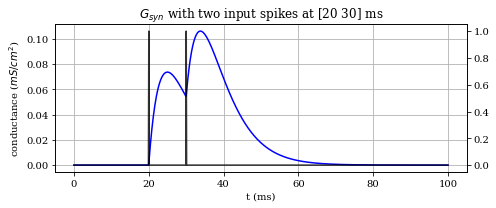

In [357]:
results = []
spikes = np.array([20,30])
time_span = np.linspace(0,100,1000)
for t in np.linspace(0,100,1000):
    results.append(gsyn(t, spikes))

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(time_span, results, c='b')

ax2 = ax.twinx()
spike_p = np.zeros(time_span.shape[0])
spike_p[spikes*10] += 1
ax2.plot(time_span, spike_p,c='k',alpha=0.8,)

ax.set(title="$G_{syn}$ "+f"with two input spikes at {spikes} ms",
       xlabel="t (ms)",
       ylabel="conductance ($mS/cm^2$)")
ax.grid()

fig.tight_layout()
fig.show()

Synaptic excitation run with complex input

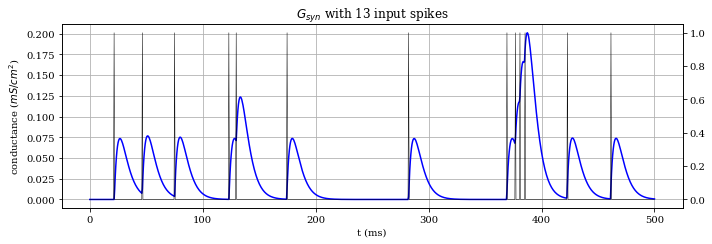

In [358]:
dt=0.1 # 0.1ms
d = 500
time_span = np.linspace(0,500,1000)
spikes = spike_train(d, 50, dt)
results = []
for t in time_span:
    results.append(gsyn(t, spikes))

fig, ax = plt.subplots(figsize=(10,3.5))
ax.plot(time_span, results,lw=1.5, c='b')

ax2 = ax.twinx()
spike_p = np.zeros(1000)
spike_p[np.rint(spikes*2).astype(int)] += 1   # Multiply by quotient of d/n_samples
ax2.plot(time_span, spike_p, c='k',alpha=1, lw=0.5)

ax.set(title="$G_{syn}$ "+f"with {spikes.shape[0]} input spikes",
       xlabel="t (ms)",
       ylabel="conductance ($mS/cm^2$)")
ax.grid()

fig.tight_layout()
fig.show()

Neuron equations

In [540]:
def minf(V):
    return 1/(1+np.e**(-(V-vmaxm)/km))
def ninf(V):
    return 1/(1+np.e**(-(V-vmaxn)/kn))

def neuron_wo_syn(X, t, I=0): 
    
    V = X[0]
    n = X[1]
    
    dVdt = (I - gl*(V-el) - gna*minf(V)*(V-ena) - gk*n*(V-ek))/C
    dndt = (ninf(V) - n)/taun
    
    return [dVdt, dndt]

Temporal run without synapsis excitation

In [541]:
from scipy.integrate import odeint
from functools import partial

In [542]:
def get_displacement(param, dmax=50,time_span=np.linspace(0,200, 1000), number=3):
    # We start from the resting point...
    ic = odeint(partial(neuron_wo_syn, **param),
                                                      y0=[0,0],
                                                      t= np.linspace(0,999, 1000))[-1]
    # and do some displacement of the potential. 
    traj = [] 
    for displacement in np.linspace(0,dmax, number):
        traj.append(odeint(partial(neuron_wo_syn, **param),
                                                      y0=ic+np.array([displacement,0]),
                                                      t=time_span))
    return traj

In [543]:
# Simulation params
time_span = np.linspace(0.0, 10.0, 1000)
Iapp = [{"I": 0},{"I": 30},{"I": 300}]

# Do the numerical integration.
trajectories = {} # We store the trajectories in a dictionnary, it is easier to recover them. 
for i,param in enumerate(Iapp):
    trajectories[i] = get_displacement(param, time_span=time_span, dmax=50,  number=3)

In [544]:
Iapp[0]['I']

0

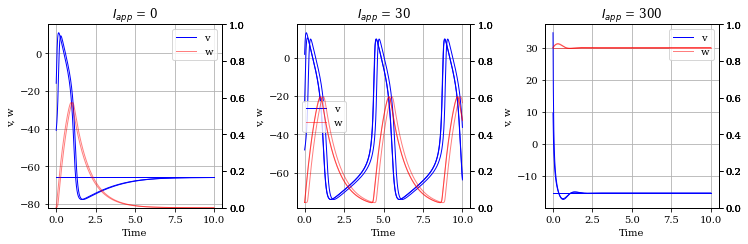

In [545]:
fig, ax = plt.subplots(1, len(Iapp), figsize=(3.5*len(Iapp),3.5))
for i,param in enumerate(Iapp):
        ax[i].set(xlabel='Time', ylabel='v, w',
                     title='$I_{app}$ = '+str(param['I']))
        for j in range(len(trajectories[i])):
            v = ax[i].plot(time_span,trajectories[i][j][:,0], color='b', lw=1)
            ax2 = ax[i].twinx()
            w = ax2.plot(time_span,trajectories[i][j][:,1], color='r', lw=1, alpha=0.5)
            ax2.set(ylim=(0,1))
        ax[i].legend([v[0],w[0]],['v','w'])
        ax[i].grid(True)
plt.tight_layout()
plt.savefig('./img/temporal_run.pdf')

In [546]:
#TODO: ADD ISOCLINES, FLOW AND PHASE PLOT FOR THE THREE SCENARIOS

In [556]:
def plot_isocline(ax, I, color='k', style='--', opacity=.5, vmin=-82,vmax=60):
    """Plot the null iscolines of the morris lecar system"""
    v = np.linspace(vmin,vmax,100)
        
    w1 = (I-gl*(v-el)-gna*minf(v)*(v-ena) )/(gk*(v-ek))
    w2 = ninf(v)
    
    ax.plot(v, w1, style, color=color, alpha=opacity)
    ax.plot(v, w2, style, color=color, alpha=opacity)
    
    ax.set_ylim(-0.1,1.2)

In [557]:
def plot_vector_field(ax, param, xrange, yrange, steps=180):
    # Compute the vector field
    x = np.linspace(xrange[0], xrange[1], steps)
    y = np.linspace(yrange[0], yrange[1], steps)
    X,Y = np.meshgrid(x,y)
    
    dx,dy = neuron_wo_syn([X,Y],0,**param)   
    
    # streamplot looks nicer than quiver
    ax.streamplot(X,Y,dx, dy, color=(0,0,0,.15))
    
    ax.set(xlim=(xrange[0], xrange[1]), ylim=(yrange[0], yrange[1]))

0 [-82.         -80.56565657 -79.13131313 -77.6969697  -76.26262626
 -74.82828283 -73.39393939 -71.95959596 -70.52525253 -69.09090909
 -67.65656566 -66.22222222 -64.78787879 -63.35353535 -61.91919192
 -60.48484848 -59.05050505 -57.61616162 -56.18181818 -54.74747475
 -53.31313131 -51.87878788 -50.44444444 -49.01010101 -47.57575758
 -46.14141414 -44.70707071 -43.27272727 -41.83838384 -40.4040404
 -38.96969697 -37.53535354 -36.1010101  -34.66666667 -33.23232323
 -31.7979798  -30.36363636 -28.92929293 -27.49494949 -26.06060606
 -24.62626263 -23.19191919 -21.75757576 -20.32323232 -18.88888889
 -17.45454545 -16.02020202 -14.58585859 -13.15151515 -11.71717172
 -10.28282828  -8.84848485  -7.41414141  -5.97979798  -4.54545455
  -3.11111111  -1.67676768  -0.24242424   1.19191919   2.62626263
   4.06060606   5.49494949   6.92929293   8.36363636   9.7979798
  11.23232323  12.66666667  14.1010101   15.53535354  16.96969697
  18.4040404   19.83838384  21.27272727  22.70707071  24.14141414
  25.57575

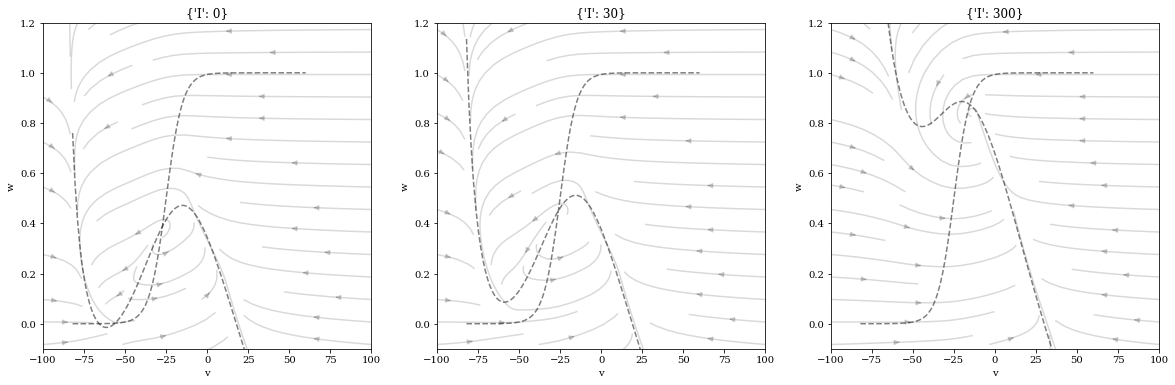

In [558]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, sc in enumerate(Iapp):
    xrange = (-100, 100)
    yrange = [-0.8, 1.8]
    plot_vector_field(ax[i], sc, xrange, yrange, 10)
    plot_isocline(ax[i], **sc)
    ax[i].set(xlabel='v', ylabel='w',
          title='{}'.format(sc))

In [559]:
eq = {
    0: {"point": [-66.55,0.004915],
        "eq": "Stable focus",
        "c": "red"},
    30: {"point": [-24,0.51],
          "eq": "Unstable node",
          "c": "orange"},
    300: {"point": [-17.302,0.86427],
          "eq": "Stable focus",
          "c": "red"}
}

In [565]:
from matplotlib.lines import Line2D


In [566]:
def plot_phase_diagram(param, eq, stability, ax=None, title=None):
    
    title = "Phase space with $I_{app}$= "+str(param['I']) 
    ax.set(xlabel='v (mV)', ylabel='n', title=title)
        
    # Isocline and flow... 
    xlimit = (-100, 100)
    ylimit = (-.3, 1.4)
    plot_vector_field(ax, param, xlimit, ylimit)
    plot_isocline(ax, **param, vmin=-82, vmax=xlimit[1])
    
    # Plot the equilibria 
    p = eq["point"]
        
    for perturb in (0.1, 0.8):
        ic = [p[0]+perturb*abs(p[0]), p[1]]
        traj = scipy.integrate.odeint(partial(neuron_wo_syn, **param),
                                          y0=ic,
                                          t=time_span)
        ax.plot(traj[:,0], traj[:,1], c='b')
    
    ax.scatter(p[0],p[1],c=eq['c'],s=50)


    # Legend
    legend = [Line2D([0], [0],marker="s", markerfacecolor=eq['c'], markersize=10, color='w', lw=4)]
    ax.legend(legend, [eq["eq"]], loc=2, prop={'size': 10})

0 [-82.         -80.16161616 -78.32323232 -76.48484848 -74.64646465
 -72.80808081 -70.96969697 -69.13131313 -67.29292929 -65.45454545
 -63.61616162 -61.77777778 -59.93939394 -58.1010101  -56.26262626
 -54.42424242 -52.58585859 -50.74747475 -48.90909091 -47.07070707
 -45.23232323 -43.39393939 -41.55555556 -39.71717172 -37.87878788
 -36.04040404 -34.2020202  -32.36363636 -30.52525253 -28.68686869
 -26.84848485 -25.01010101 -23.17171717 -21.33333333 -19.49494949
 -17.65656566 -15.81818182 -13.97979798 -12.14141414 -10.3030303
  -8.46464646  -6.62626263  -4.78787879  -2.94949495  -1.11111111
   0.72727273   2.56565657   4.4040404    6.24242424   8.08080808
   9.91919192  11.75757576  13.5959596   15.43434343  17.27272727
  19.11111111  20.94949495  22.78787879  24.62626263  26.46464646
  28.3030303   30.14141414  31.97979798  33.81818182  35.65656566
  37.49494949  39.33333333  41.17171717  43.01010101  44.84848485
  46.68686869  48.52525253  50.36363636  52.2020202   54.04040404
  55.8787

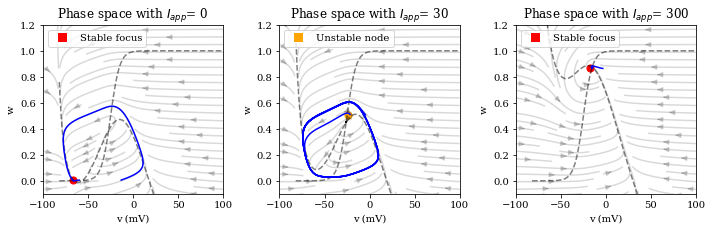

In [570]:
fig, ax = plt.subplots(1,3, figsize=(10, 3.3))
for i, param in enumerate(Iapp):
    plot_phase_diagram(param, eq[param['I']],"stable", ax[i])
plt.tight_layout()
plt.savefig('./img/phase_dig.pdf')

F-I curve no synaptical excitation

In [402]:
    from collections import Counter
    import os.path

    def count_peaks(temporal_series, thr):
        # List of values
        values = temporal_series>-thr
        values = values.astype('int')
        # Computes the crossing 1: ascendent -1: descendent
        difference = values[1:]-values[:-1]
        # Count the number of 1 (ascendent crossings)
        peaks = Counter(difference)[1]

        return peaks

In [491]:
d, n = 500, 1000
t = np.linspace(0.0, d, n)
s0=[-66, 0]

Iapps = np.arange(-10,180,1)

if not os.path.isfile('./data/frequency.npy'): 
    freq_store = np.zeros(Iapps.shape[0])

    for ix,I in enumerate(Iapps):
        run = odeint(neuron_wo_syn, s0, t, args=(I,))
        peaks = count_peaks(run[:,0], 0)
        freq = peaks/d*1000
        freq_store[ix] = freq

    np.save('./data/frequency.npy',freq_store)
else:
    freq_store = np.load('./data/frequency.npy')

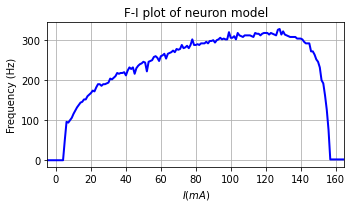

In [35]:
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(Iapps, freq_store, lw=2.0, c='b')

ax.set(title="F-I plot of neuron model",
       xlabel="$I (mA)$",
       ylabel="Frequency (Hz)",
       xlim=(-5,165))
ax.grid()

fig.tight_layout()
fig.show()

**Temporal run with synaptical excitation**

In [36]:
# FAILED ATTEMPT NUMBER 1 AT SPEEDING THINGS UP:
# COMPUTE A TEMPORAL RUN AND PASS IT AS PARAMETER TO ODEINT
# IT WORKS BUT ONLY IF N=10*D OR (THE SAME) DT=0.1

def compute_syn_current(spikes, d, n):
    """ Computes temporal run and mean value
    Params:
        spikes ([float]): list with the time index of the spikes
        d (int): time duration in ms
        n (int): number of time_samples
    Returns:
        run ([float]): temporal run for the synaptic excitation with length n 
        mean_current: returns the mean value of the current
    """
    # Create synaptic excitation
    time_span = np.linspace(0, d, n)
    run = np.zeros(n)
    
    for it, t in enumerate(time_span):
        run[it] = (gsyn(t, spikes))
    
    return run, run.mean()


def neuron(X, t, param): 
    
    V = X[0]
    n = X[1]
    
    dVdt = (I - gl*(V-el) - gna*minf(V)*(V-ena) - gk*n*(V-ek) - 2*param[int(t*10)-2]*(V-esyn))/C
    dndt = (ninf(V) - n)/taun
    
    return [dVdt, dndt]

In [37]:
# FAILED ATTEMPT NUMBER 2 AT SPEEDING THINGS UP:
# CREATE A GENERATOR FUNCTION THAT RETURNS THE TEMPORAL RUN VALUE
# IT DOESN'T WORK BC ODEINT TAKES NON-CONSTANT DTs

def compute_syn_current(spikes, d, n):
    """ Creates generator function for the synaptic excitation
    Params:
        spikes ([float]): list with the time index of the spikes
        d (int): time duration in ms
        n (int): number of time_samples
    Returns:
        generator (func()): generator function for the synaptic excitation 
        mean_current: returns the mean value of the current
    """
    # Create synaptic excitation
    time_span = np.linspace(0, d, n)
    run = np.zeros(n)
    
    for it, t in enumerate(time_span):
        run[it] = (gsyn(t, spikes))
    
    def gen(run, n):
        i = 0
        while i<n:
            yield run[i]
            i += 1
    
    return run, run.mean()

def neuron(X, t, param): 
    
    V = X[0]
    n = X[1]
    
    dVdt = (I - gl*(V-el) - gna*minf(V)*(V-ena) - gk*n*(V-ek) - 2*param[int(t*10)-2]*(V-esyn))/C
    dndt = (ninf(V) - n)/taun
    
    return [dVdt, dndt]

How to speed up gsyn?

In [38]:
t = np.linspace(0,100,100)
run = alfa(t)
print(f"At t=25ms it only is {run[25]}")

At t=25ms it only is 0.017860483200285725


We only use spikes in a reduced time range -Xms and 0ms

In [371]:
def opt_gsyn(t, train):
    result = 0
    reduced_train = train[(train > (t-40)) & (train < t)]
    for it in reduced_train:
        result += alfa(t-it)*step(t-it)
    return result

In [372]:
d, n = 300, 3000
time_span = np.linspace(0.0, d, n)
train = spike_train(d, 50, d/n)

run1 = np.zeros(n)
run2 = np.zeros(n)

for it, t in enumerate(time_span):
    run1[it] = gsyn(t, train)
    run2[it] = opt_gsyn(t, train)

Text(0.5, 1.0, 'They look quite similar to me')

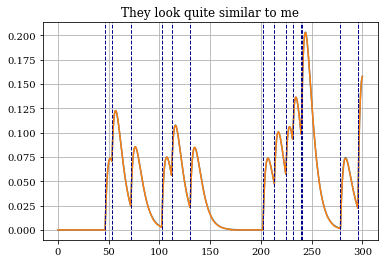

In [373]:
plt.plot(time_span, run1)
plt.plot(time_span, run2)
plt.grid()

for t in train:
    plt.axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

plt.title("They look quite similar to me")

In [42]:
#TODO: Compute RMSE per different X values

In [469]:
# ATTEMPT N. 3 AND SUCCESFUL ATTEMPT TO THE NEURON SIMULATION
# WE PASS THE SPIKES TEMPORAL INDEXES AND COMPUTE THE RESPONSE FOR THE T VALUE
# SLOW WHEN WE HAVE A HIGH NUMBER OF SPIKES. CAN BE SPED UP TRIMMING THE SPIKES WE CONSIDER FOR A GIVEN T

def compute_syn_current(spikes, d, n):
    """ Returns the mean current value
    """
    # Create synaptic excitation
    time_span = np.linspace(0, d, n)
    run = np.zeros(n)
    
    for it, t in enumerate(time_span):
        run[it] = (gsyn(t, spikes))
    
    return run, run.mean()

def neuron(X, t, spikes): 
    """ WRITE DOC """
    V, n = X
    
    dVdt = (0 - gl*(V-el) - gna*minf(V)*(V-ena) - gk*n*(V-ek) - 1*opt_gsyn(t, spikes)*(V-esyn))/C
    dndt = (ninf(V) - n)/taun
    
    return [dVdt, dndt]

In [393]:
d, n = 200, 4000
time_span = np.linspace(0.0, d, n)
spikes = spike_train(d, 50, d/n)

mean = compute_syn_current(spikes, d, n)

run, obs = odeint(partial(neuron, **{"spikes": spikes}), y0=[-66,0], t=time_span, full_output=1)

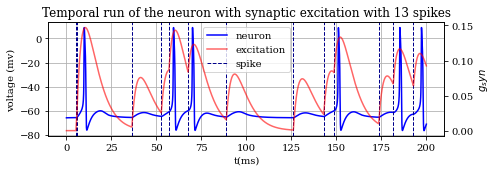

In [398]:
fig, ax = plt.subplots(1, figsize=(7,2.5))

# Plot neuron response
l1, = ax.plot(time_span, run[:,0], c='b', label='neuron')

# Plot spike lines
for t in spikes:
    l3 = ax.axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

# Create synaptic excitation
results = np.zeros(time_span.shape[0])
for it, t in enumerate(time_span):
    results[it] = (gsyn(t, spikes))

# And plot it in secondary axes
ax2 = ax.twinx()
ax2.set(ylabel="$g_syn$")
l2, = ax2.plot(time_span,results, c='r', alpha=0.6, label='excitation')

ax.set(title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes",
   xlabel="t(ms)",
   ylabel="voltage (mv)",
   )
ax.grid()

lines = [l1,l2,l3]
ax.legend(lines, [l.get_label() for l in lines])


fig.tight_layout()
fig.savefig('./img/neuron response.pdf')

F-I plot with average synaptic input current

45.20840394216856

In [434]:
spikes = spike_train(d, 500, d/n)

syn, me = compute_syn_current(spikes, d, n)

run = odeint(partial(neuron, **{"spikes":spikes}), y0=[-66,0], t=time_span)

V = run[:,0]
res = syn*(-V)
u_syn = sum(res)*d/n/100

peaks = count_peaks(run[:,0], 0)
freqs = peaks/d*1000

print(freqs)

225.0


In [450]:
def neuron(X, t, it, syn): 
    """ WRITE DOC """
    V, n = X
    
    dVdt = (0 - gl*(V-el) - gna*minf(V)*(V-ena) - gk*n*(V-ek) - 1*syn[it]*(V-esyn))/C
    dndt = (ninf(V) - n)/taun
    
    return np.array([dVdt, dndt])

In [473]:
d, n= 500, 1000
time_span = np.linspace(0.0, d, n)

rates = np.linspace(0,2500,150)

currents = np.zeros(rates.shape[0])
freqs = np.zeros(rates.shape[0])

if os.path.isfile('./data/frequency_syn.npy'): 
    for i,r in enumerate(rates):
        if not i%2: print(f"Now computing rate: {r:.2f} {i}/{rates.shape[0]}")
        spikes = spike_train(1000, r, d/n)

        syn, mean = compute_syn_current(spikes, d, n)
        
        X = np.zeros((2,n))
        #for it,t in enumerate(time_span[:-1]):
        #    X[:,it+1] = X[:,it] + neuron(X[:,it], t, it, syn)*dt # Crappy euler integration
        run = odeint(partial(neuron, **{"spikes":spikes}), y0=[-66,0], t=time_span)

        V = run[:,0]
        res = syn*(-V)
        u_syn = sum(res)*d/n/100
        
        currents[i] = u_syn

        peaks = count_peaks(run[:,0], 0)
        freqs[i] = peaks/d*1000
    np.save('./data/frequency_syn.npy', freqs)
else:
    freqs = np.load('./data/frequency_syn.npy')

Now computing rate: 0.00 0/150
Now computing rate: 33.56 2/150
Now computing rate: 67.11 4/150
Now computing rate: 100.67 6/150
Now computing rate: 134.23 8/150
Now computing rate: 167.79 10/150
Now computing rate: 201.34 12/150
Now computing rate: 234.90 14/150
Now computing rate: 268.46 16/150
Now computing rate: 302.01 18/150
Now computing rate: 335.57 20/150
Now computing rate: 369.13 22/150
Now computing rate: 402.68 24/150
Now computing rate: 436.24 26/150
Now computing rate: 469.80 28/150
Now computing rate: 503.36 30/150
Now computing rate: 536.91 32/150
Now computing rate: 570.47 34/150
Now computing rate: 604.03 36/150
Now computing rate: 637.58 38/150
Now computing rate: 671.14 40/150
Now computing rate: 704.70 42/150
Now computing rate: 738.26 44/150
Now computing rate: 771.81 46/150
Now computing rate: 805.37 48/150
Now computing rate: 838.93 50/150
Now computing rate: 872.48 52/150
Now computing rate: 906.04 54/150
Now computing rate: 939.60 56/150
Now computing rate: 973

In [503]:
import scipy.optimize

In [510]:
z = np.polyfit(currents/2, freqs*1.7, 2)
p = np.poly1d(z)

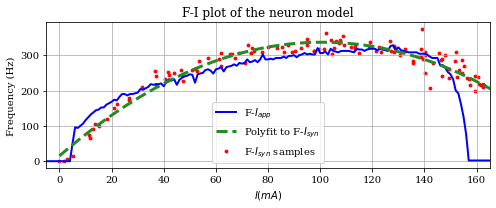

In [532]:
fig, ax = plt.subplots(figsize=(7,3))

ax.plot(Iapps, freq_store, lw=2.0, c='b', label='F-$I_{app}$')
ax.scatter(currents/2, freqs*1.7, c='r', s=8 , label='F-$I_{syn}$ samples') 
ax.plot(np.linspace(0,180), p(np.linspace(0,180)), label='Polyfit to F-$I_{syn}$',c='forestgreen', lw=3, ls='--')

ax.set(title="F-I plot of the neuron model",
       xlabel="$I (mA)$",
       ylabel="Frequency (Hz)",
       xlim=(-5,165))
ax.grid()
ax.legend()

fig.tight_layout()
fig.savefig('./img/FI_neuron_response.pdf')

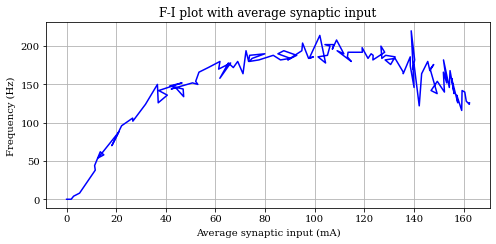

In [474]:
fig, ax = plt.subplots(1, figsize=(7,3.5))

ax.plot(currents/2, freqs, c='b') 

ax.set(title=f"F-I plot with average synaptic input",
   xlabel="Average synaptic input (mA)",
   ylabel="Frequency (Hz)",
   )
ax.grid()


fig.tight_layout()
fig.show()

**3-Study two neuron dynamics**


In [51]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from functools import partial

In [52]:
# global single cell parameters
ena, ek, el, esyn = 60, -90, -80, 0
gna, gk, gl = 20, 10, 8 
C, I = 1, 0
vmaxm, vmaxn = -20, -25
km, kn = 15, 5
taun, taus = 1, 5 

# global two cell parameters
vt, vs = 2, 5
As = 1
b1, b2 = 0.25, 0.1
I1, I2 = 0, 0
# g_ext, g_exc, g_inh = 3, 1, 0.1

In [53]:
def alfa(t):
    return 1/taus**2*t*np.e**(-t/taus)

def step(t):
    return 1 if t > 0 else 0

def opt_gsyn(t, train):
    result = 0
    reduced_train = train[(train > (t-40)) & (train < t)]
    for it in reduced_train:
        result += alfa(t-it)*step(t-it)
    return result

def minf(V):
    return 1/(1+np.e**(-(V-vmaxm)/km))

def ninf(V):
    return 1/(1+np.e**(-(V-vmaxn)/kn))

def fpre(v):
    return 1./(1 + np.e**(-(v-vt)/vs))

def twoneurons(X, t, spikes, g_ext, g_inh, g_exc):
    V1, V2, n1, n2, s1, s2 = X
   
    dV1dt = (I1 - gl*(V1-el) - gna*minf(V1)*(V1-ena) - gk*n1*(V1-ek) - g_inh*s2*(V1 - (-80)) - g_ext*opt_gsyn(t, spikes)*(V1))/C # 
    dn1dt = (ninf(V1) - n1)/taun
    
    dV2dt = (I2 - gl*(V2-el) - gna*minf(V2)*(V2-ena) - gk*n2*(V2-ek) - g_exc*s1*(V2 - 0))/C
    dn2dt = (ninf(V2) - n2)/taun
    
    ds1dt = As * fpre(V1)*(1-s1) - b1*s1
    ds2dt = As * fpre(V2)*(1-s2) - b2*s2
    
    return [dV1dt, dV2dt, dn1dt, dn2dt, ds1dt, ds2dt]
    

In [54]:
from matplotlib.ticker import FormatStrFormatter

In [55]:
d, n = 200, 500
time_span = np.linspace(0.0, d, n)
spikes = spike_train(d, 50, d/n)

params = {'spikes': spikes,
          'g_ext': 2, 
          'g_exc': 0, 
          'g_inh': 0}

y0 = [-66,-66,0,0,0,0]

run, obs = odeint(partial(twoneurons, **params), y0=y0, t=time_span, full_output=1)

<ipython-input-56-c90abd28df84>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


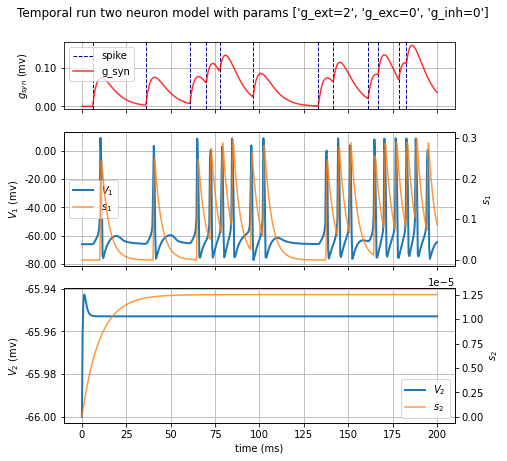

In [56]:
fig, ax = plt.subplots(3,1, figsize=(7,7), sharex=True, gridspec_kw={ 'height_ratios': [1, 2, 2],
                                                                      'wspace':0, 
                                                                      'hspace':0.2 })

# Plot neuron 2 response
l3, = ax[2].plot(time_span, run[:,1], c='tab:blue', label='$V_2$', lw=2.0)
ax11 = ax[2].twinx()
ax11.set(ylabel=f'$s_{{{2}}}$')
l4, = ax11.plot(time_span, run[:,5], c='tab:orange', label='$s_2$', alpha=0.8)

lines = [l3,l4]
ax[2].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[2].set(xlabel="time (ms)",
       ylabel="$V_{2}$ (mv)",
       )
ax[2].grid()

# Plot spike lines
for t in spikes:
    l1 = ax[0].axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

# Create synaptic excitation
results = np.zeros(time_span.shape[0])
for it, t in enumerate(time_span):
    results[it] = (opt_gsyn(t, spikes))

# And plot it in secondary axe
l2, = ax[0].plot(time_span,results, c='r', alpha=0.8, label='g_syn')

lines = [l1,l2]
ax[0].legend(lines, [l.get_label() for l in lines])

ax[0].set(ylabel="$g_{syn}$ (mv)",
       )
ax[0].grid()


# Plot neuron 1 response
l3, = ax[1].plot(time_span, run[:,0], c='tab:blue', label='$V_1$', lw=2.0)
ax11 = ax[1].twinx()
ax11.set(ylabel='$s_1$')
l4, = ax11.plot(time_span, run[:,4], c='tab:orange', label='$s_1$', alpha=0.8)

lines = [l3,l4]
ax[1].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[1].set(
       ylabel="$V_{1}$ (mv)",
       )
ax[1].grid()

for a in ax:
    a.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 


pars = [f'{name}={params[name]}' for name in ['g_ext', 'g_exc', 'g_inh']]
fig.suptitle(f'Temporal run two neuron model with params {pars}', y=0.95)

fig.tight_layout()
fig.show()

In [57]:
d, n = 200, 500
time_span = np.linspace(0.0, d, n)
spikes = spike_train(d, 50, d/n)

params = {'spikes': spikes,
          'g_ext': 2, 
          'g_exc': 1, 
          'g_inh': 0}

y0 = [-66,-66,0,0,0,0]

run, obs = odeint(partial(twoneurons, **params), y0=y0, t=time_span, full_output=1)

<ipython-input-58-6efc11d14c88>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


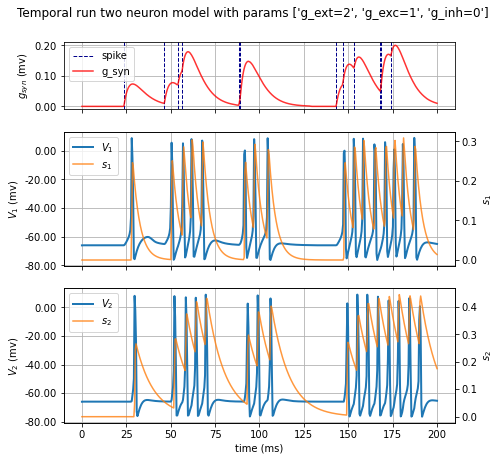

In [58]:
fig, ax = plt.subplots(3,1, figsize=(7,7), sharex=True, gridspec_kw={ 'height_ratios': [1, 2, 2],
                                                         'wspace':0, 
                                                         'hspace':0.2 })
#fig.subplots_adjust(hspace=5)

# Plot neuron 2 response
l3, = ax[2].plot(time_span, run[:,1], c='tab:blue', label='$V_2$', lw=2.0)
ax11 = ax[2].twinx()
ax11.set(ylabel='$s_2$')
l4, = ax11.plot(time_span, run[:,5], c='tab:orange', label='$s_2$', alpha=0.8)

lines = [l3,l4]
ax[2].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[2].set(xlabel="time (ms)",
       ylabel="$V_{2}$ (mv)",
       )
ax[2].grid()

# Plot spike lines
for t in spikes:
    l1 = ax[0].axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

# Create synaptic excitation
results = np.zeros(time_span.shape[0])
for it, t in enumerate(time_span):
    results[it] = (opt_gsyn(t, spikes))

# And plot it in secondary axe
l2, = ax[0].plot(time_span,results, c='r', alpha=0.8, label='g_syn')

lines = [l1,l2]
ax[0].legend(lines, [l.get_label() for l in lines])

ax[0].set(ylabel="$g_{syn}$ (mv)",
       )
ax[0].grid()


# Plot neuron 1 response
l3, = ax[1].plot(time_span, run[:,0], c='tab:blue', label='$V_1$', lw=2.0)
ax11 = ax[1].twinx()
ax11.set(ylabel='$s_1$')
l4, = ax11.plot(time_span, run[:,4], c='tab:orange', label='$s_1$', alpha=0.8)

lines = [l3,l4]
ax[1].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[1].set(
       ylabel="$V_{1}$ (mv)",
       )
ax[1].grid()

for a in ax:
    a.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 


pars = [f'{name}={params[name]}' for name in ['g_ext', 'g_exc', 'g_inh']]
fig.suptitle(f'Temporal run two neuron model with params {pars}', y=0.95)

fig.tight_layout()
fig.show()

In [59]:
d, n = 200, 500
time_span = np.linspace(0.0, d, n)
spikes = spike_train(d, 50, d/n)

params = {'spikes': spikes,
          'g_ext': 2, 
          'g_exc': 1, 
          'g_inh': 2}

y0 = [-66,-66,0,0,0,0]

run, obs = odeint(partial(twoneurons, **params), y0=y0, t=time_span, full_output=1)

<ipython-input-60-6efc11d14c88>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


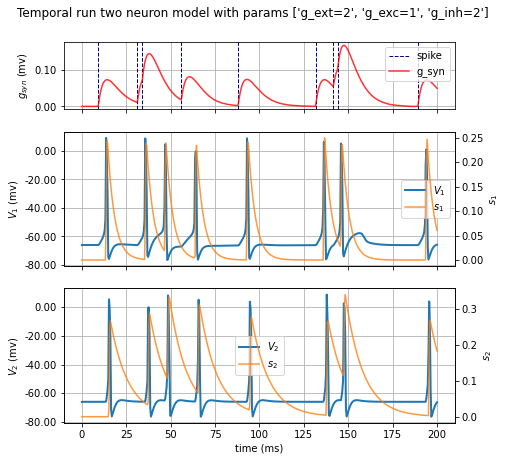

In [60]:
fig, ax = plt.subplots(3,1, figsize=(7,7), sharex=True, gridspec_kw={ 'height_ratios': [1, 2, 2],
                                                         'wspace':0, 
                                                         'hspace':0.2 })
#fig.subplots_adjust(hspace=5)

# Plot neuron 2 response
l3, = ax[2].plot(time_span, run[:,1], c='tab:blue', label='$V_2$', lw=2.0)
ax11 = ax[2].twinx()
ax11.set(ylabel='$s_2$')
l4, = ax11.plot(time_span, run[:,5], c='tab:orange', label='$s_2$', alpha=0.8)

lines = [l3,l4]
ax[2].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[2].set(xlabel="time (ms)",
       ylabel="$V_{2}$ (mv)",
       )
ax[2].grid()

# Plot spike lines
for t in spikes:
    l1 = ax[0].axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

# Create synaptic excitation
results = np.zeros(time_span.shape[0])
for it, t in enumerate(time_span):
    results[it] = (opt_gsyn(t, spikes))

# And plot it in secondary axe
l2, = ax[0].plot(time_span,results, c='r', alpha=0.8, label='g_syn')

lines = [l1,l2]
ax[0].legend(lines, [l.get_label() for l in lines])

ax[0].set(ylabel="$g_{syn}$ (mv)",
       )
ax[0].grid()


# Plot neuron 1 response
l3, = ax[1].plot(time_span, run[:,0], c='tab:blue', label='$V_1$', lw=2.0)
ax11 = ax[1].twinx()
ax11.set(ylabel='$s_1$')
l4, = ax11.plot(time_span, run[:,4], c='tab:orange', label='$s_1$', alpha=0.8)

lines = [l3,l4]
ax[1].legend(lines, [l.get_label() for l in lines])

#title=f"Temporal run of the neuron with synaptic excitation with {spikes.shape[0]} spikes"
ax[1].set(
       ylabel="$V_{1}$ (mv)",
       )
ax[1].grid()

for a in ax:
    a.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 


pars = [f'{name}={params[name]}' for name in ['g_ext', 'g_exc', 'g_inh']]
fig.suptitle(f'Temporal run two neuron model with params {pars}', y=0.95)

fig.tight_layout()
fig.show()

### 4- Short Term synaptical Plasticity

Implementation of the STP model proposed by Tsodyks and Markram [1]

[1] Tsodyks, Misha; Pawelzik, Klaus and Markram, Henry (1998). Neural Networks with Dynamic Synapses. Neural Computation. 10(4): 821-835.


In [61]:
from math import trunc

def stp(X):
    x,u,s = X
    return np.array([(1-x)/taud,
                     -u/tauf,
                     -s/taus])

In [62]:
d, n, dt = 300, 3001, 0.1 # Preserve this numbers ALWAYS -> n=d*10+1
time_span = np.linspace(0,d,n)
results = np.zeros((3,n)) # x,u,s
results[0,0] = 1

# STD dominated Params
taud, tauf, taus = 750, 50, 20
af, A = 0.45, 1

spikes = spike_train(d, 30, dt)
c=[]
for it, t in enumerate(time_span[:-1]):
    if it in (spikes*10).astype(int):
        xm, um, sm = results[:,it-1]   # This will break if there is spike at 0
        un = um+af*(1-um)
        results[:,it] =  np.array([xm*(1-un),un,sm+A*un*xm])
        
    results[:,it+1] = results[:,it] + stp(results[:,it])*dt # Crappy euler integration

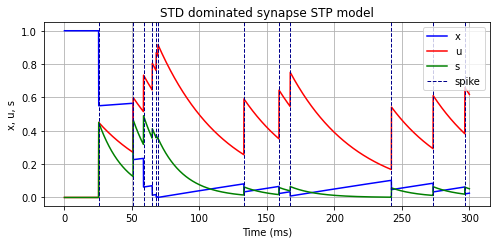

In [63]:
fig, ax = plt.subplots(1, figsize=(7,3.5))

l1, = ax.plot(time_span, results[0,:], c='b', label='x')
l2, = ax.plot(time_span, results[1,:], c='r', label='u')
l3, = ax.plot(time_span, results[2,:], c='g', label='s')

# Plot spike lines
for t in spikes:
    l4 = ax.axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

ax.set(title=f"STD dominated synapse STP model",
       xlabel="Time (ms)",
   ylabel="x, u, s",
   )
ax.grid()

lines = [l1,l2,l3,l4]
ax.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()
fig.show()

In [64]:
d, n, dt = 300, 3001, 0.1 # Preserve this numbers ALWAYS -> n=d*10+1
time_span = np.linspace(0,d,n)
results = np.zeros((3,n)) # x,u,s
results[0,0] = 1

# STE dominated Params
taud, tauf, taus = 50, 750, 20
af, A = 0.15, 1

spikes = spike_train(d, 30, dt)
c=[]
for it, t in enumerate(time_span[:-1]):
    if it in (spikes*10).astype(int):
        xm, um, sm = results[:,it-1]   # This will break if there is spike at 0
        un = um+af*(1-um)
        results[:,it] =  np.array([xm*(1-un),un,sm+A*un*xm])
        
    results[:,it+1] = results[:,it] + stp(results[:,it])*dt

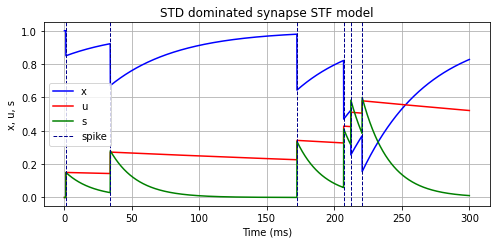

In [65]:
fig, ax = plt.subplots(1, figsize=(7,3.5))

l1, = ax.plot(time_span, results[0,:], c='b', label='x')
l2, = ax.plot(time_span, results[1,:], c='r', label='u')
l3, = ax.plot(time_span, results[2,:], c='g', label='s')

# Plot spike lines
for t in spikes:
    l4 = ax.axvline(x=t, color='darkblue', linestyle='dashed', linewidth=1, label='spike')

ax.set(title=f"STE dominated synapse STF model",
       xlabel="Time (ms)",
   ylabel="x, u, s",
   )
ax.grid()

lines = [l1,l2,l3,l4]
ax.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()
fig.show()